In [1]:
import sys
sys.path.append('../..')
from viz.pass_network import plot_pass_network, plot_pass_network_first_half, plot_pass_network_second_half
from viz.pass_analysis import plot_pass_flow, plot_pass_hull
from viz.shot_xg import plot_shot_xg
from viz.shot_map_report import plot_shot_report
from viz.stats_table import create_player_analysis_complete
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# === CONFIGURACIÓN DEL PARTIDO ===
MATCH_FOLDER = '2025-12-06_InterMiamiCF_VancouverWhitecaps'
DATA_PATH = f'./{MATCH_FOLDER}'

HOME_TEAM = 'Inter Miami'
AWAY_TEAM = 'Vancouver'
MATCH_DATE = '2024-12-06'
SEASON = 'MLS Playoffs 2024'

# === RUTAS DE LOGOS ===
HOME_LOGO_PATH = '../logos/MLS/InterMiami.png'
AWAY_LOGO_PATH = '../logos/MLS/Vancouver.png'

# === COLORES DE EQUIPOS ===
HOME_COLORS = ['#F7B5CD', '#000000']  # Inter Miami: rosa, negro
AWAY_COLORS = ['#003DA5', '#FFFFFF']  # Vancouver: azul, blanco

In [3]:
# Verificar datos existentes
import os
files = os.listdir(DATA_PATH)
print(f"Archivos en {MATCH_FOLDER}:")
for f in sorted(files):
    size = os.path.getsize(f'{DATA_PATH}/{f}') / 1024
    print(f"  - {f}: {size:.1f} KB")

# Cargar datos básicos
events = pd.read_csv(f'{DATA_PATH}/match_events.csv')
info = pd.read_csv(f'{DATA_PATH}/match_info.csv')
print(f"\nEventos: {len(events)} | Equipos: {info['team'].unique()}")

Archivos en 2025-12-06_InterMiamiCF_VancouverWhitecaps:
  - match_aggregates.csv: 9.8 KB
  - match_events.csv: 976.1 KB
  - match_info.csv: 5.6 KB
  - player_network.csv: 30.9 KB
  - spatial_analysis.csv: 5.8 KB

Eventos: 1633 | Equipos: [nan 'Inter Miami CF' 'Vancouver Whitecaps' 'Vancouver']


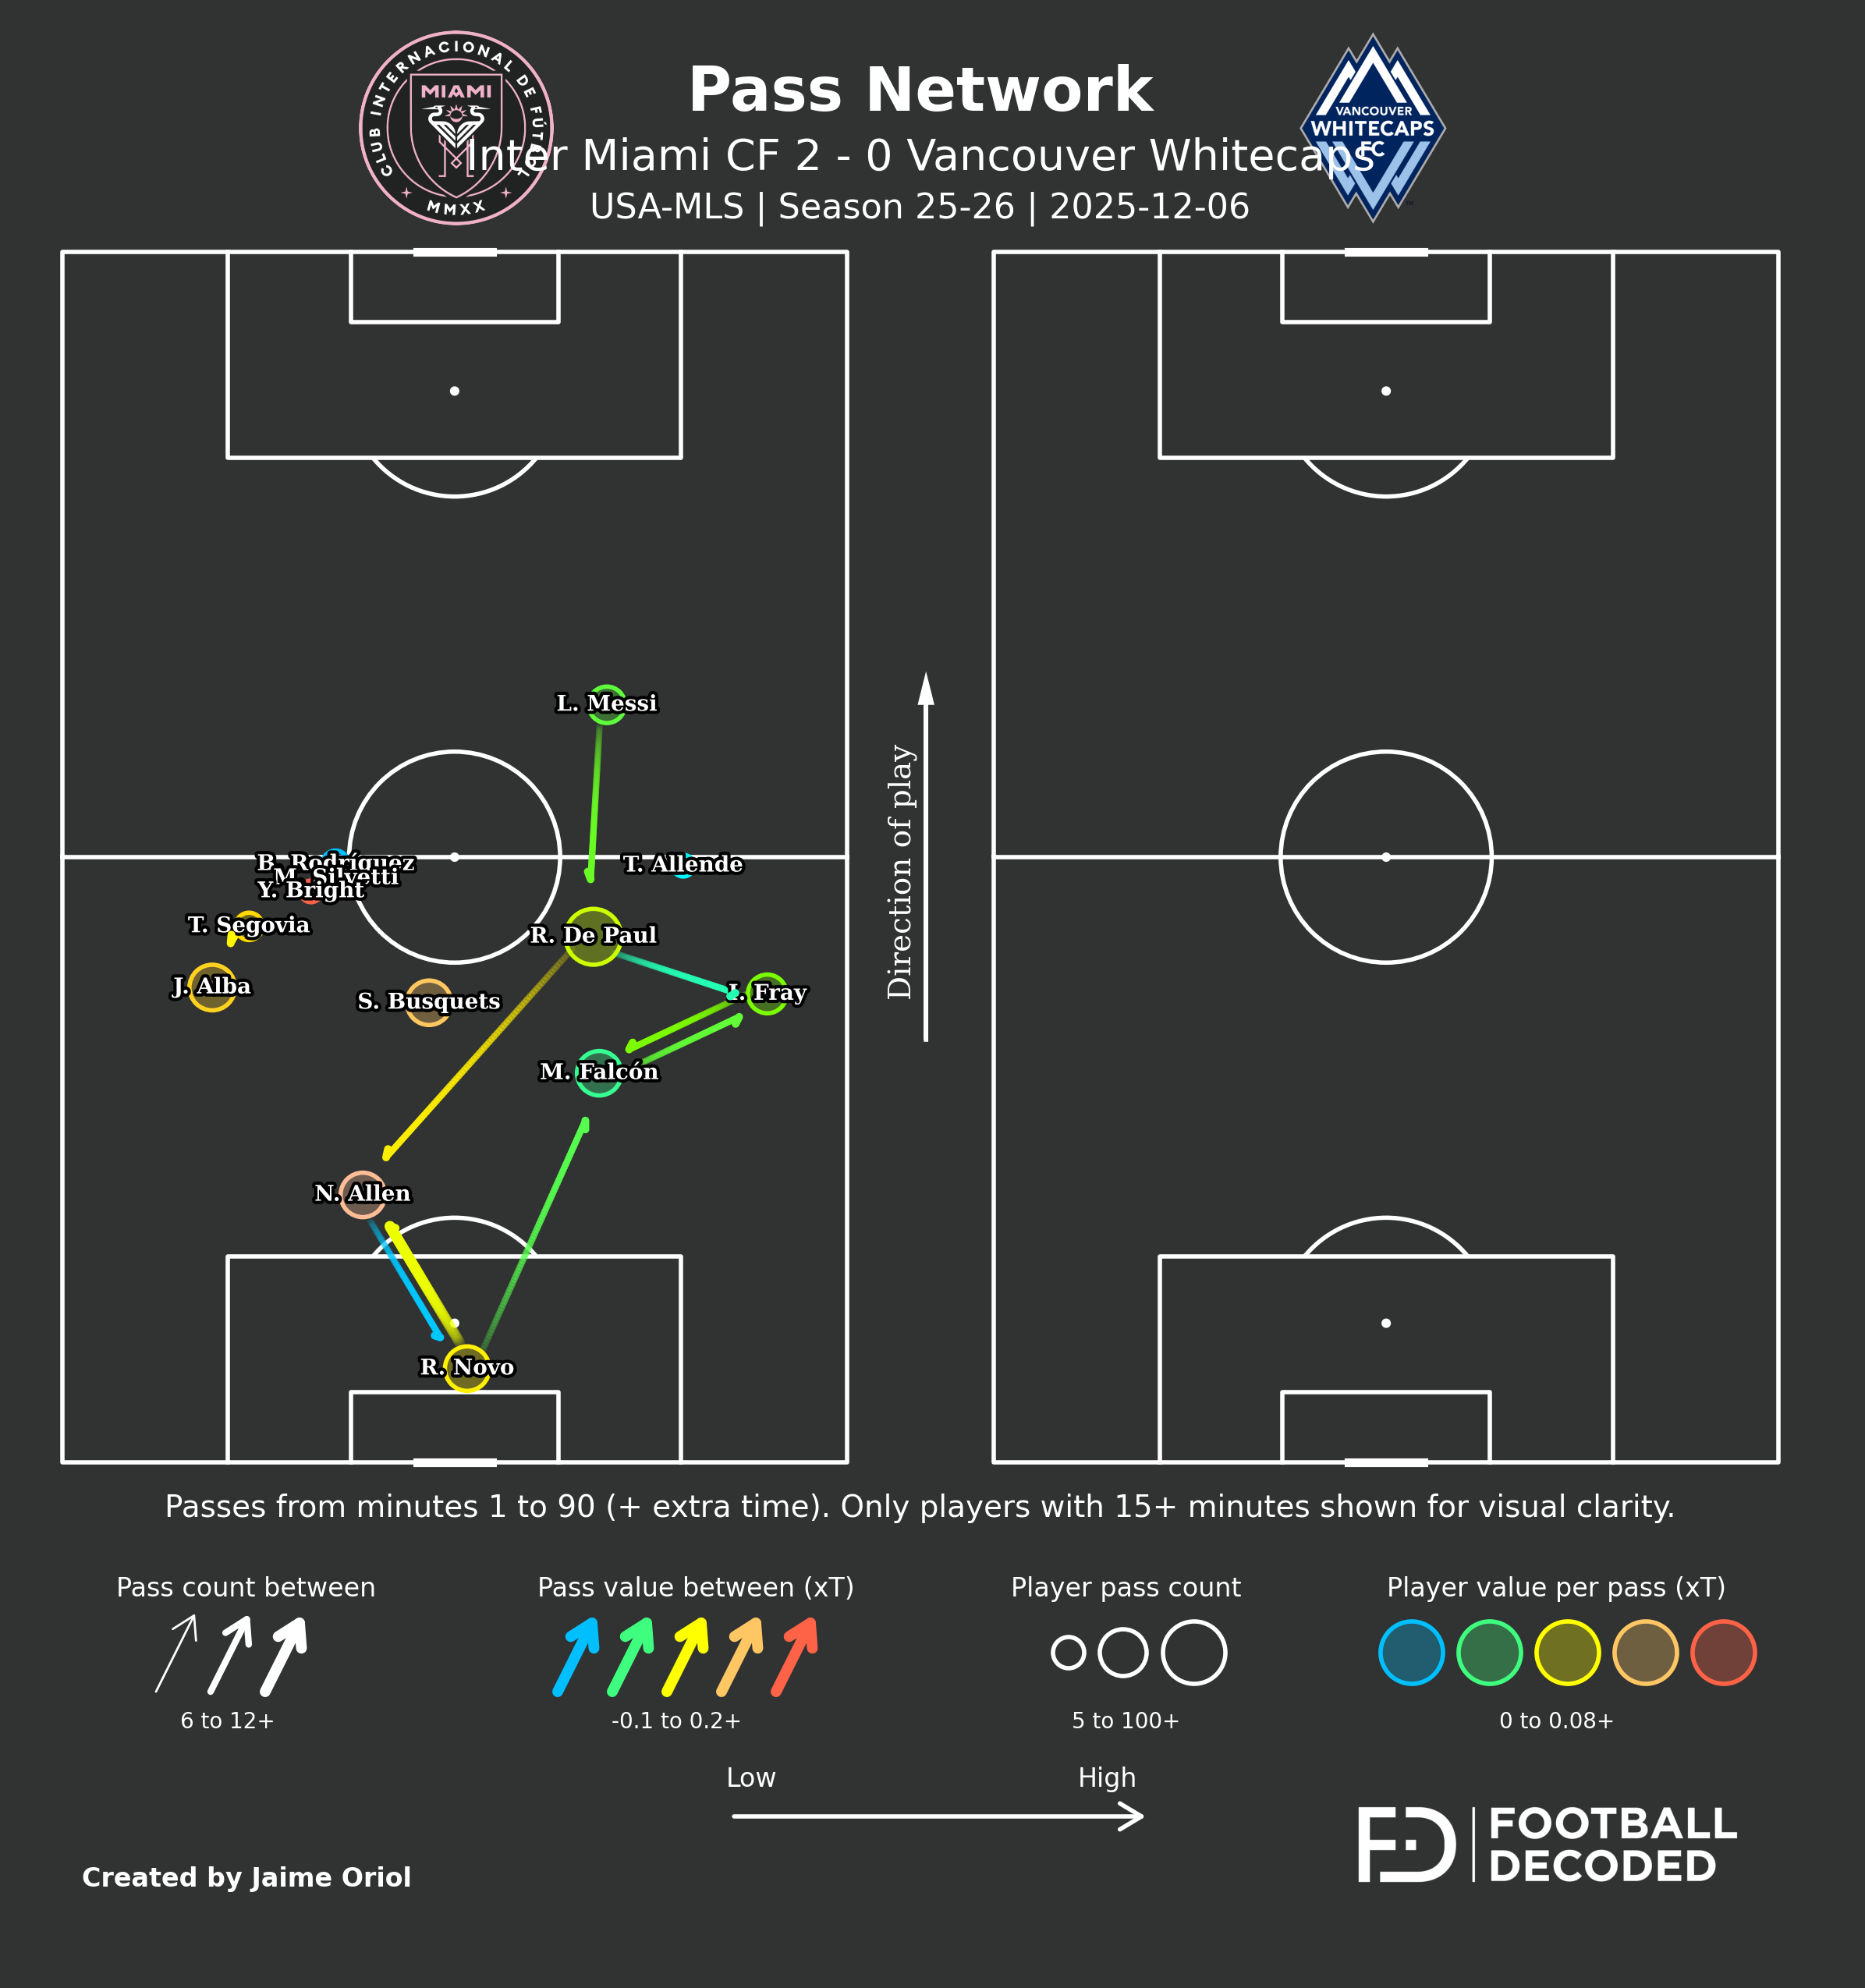

In [4]:
# Pass Network - Partido completo
fig_network = plot_pass_network(
    network_csv_path=f'{DATA_PATH}/player_network.csv',
    info_csv_path=f'{DATA_PATH}/match_info.csv',
    aggregates_csv_path=f'{DATA_PATH}/match_aggregates.csv',
    home_logo_path=HOME_LOGO_PATH,
    away_logo_path=AWAY_LOGO_PATH
)

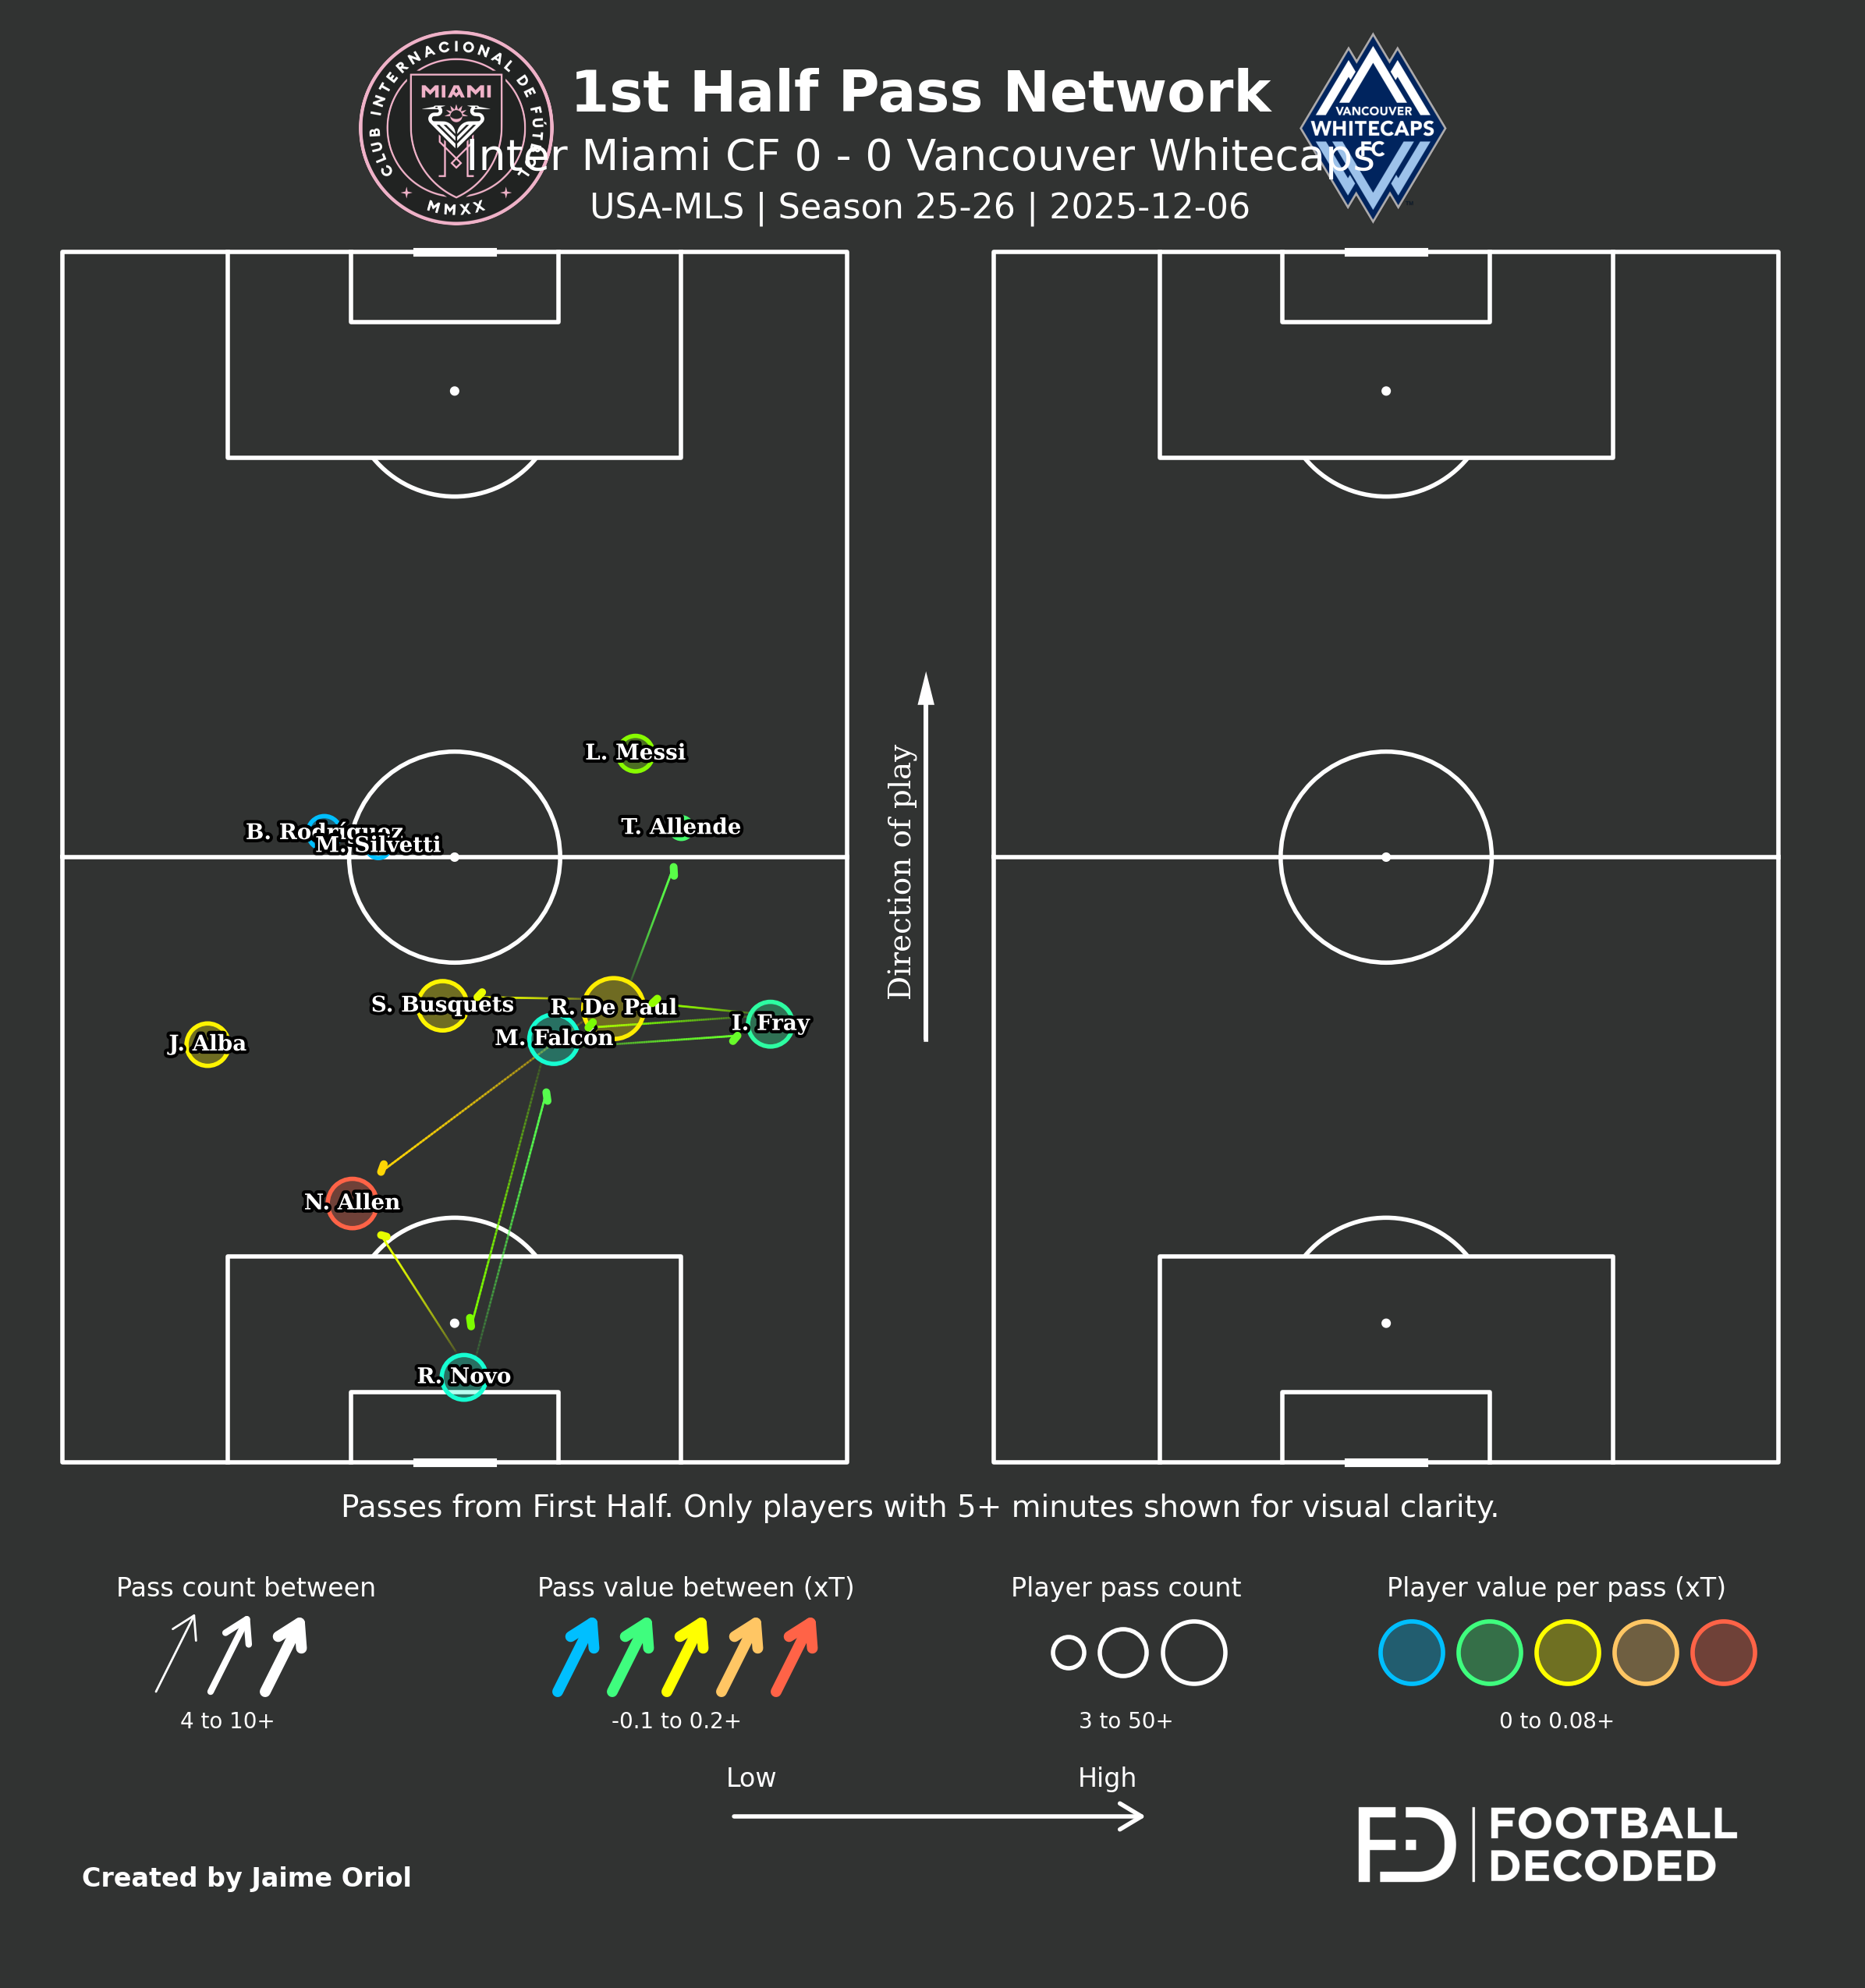

In [5]:
# Pass Network - Primer tiempo (jugadores >5 minutos)
fig_network_first = plot_pass_network_first_half(
    network_csv_path=f'{DATA_PATH}/player_network.csv',
    info_csv_path=f'{DATA_PATH}/match_info.csv',
    aggregates_csv_path=f'{DATA_PATH}/match_aggregates.csv',
    home_logo_path=HOME_LOGO_PATH,
    away_logo_path=AWAY_LOGO_PATH
)

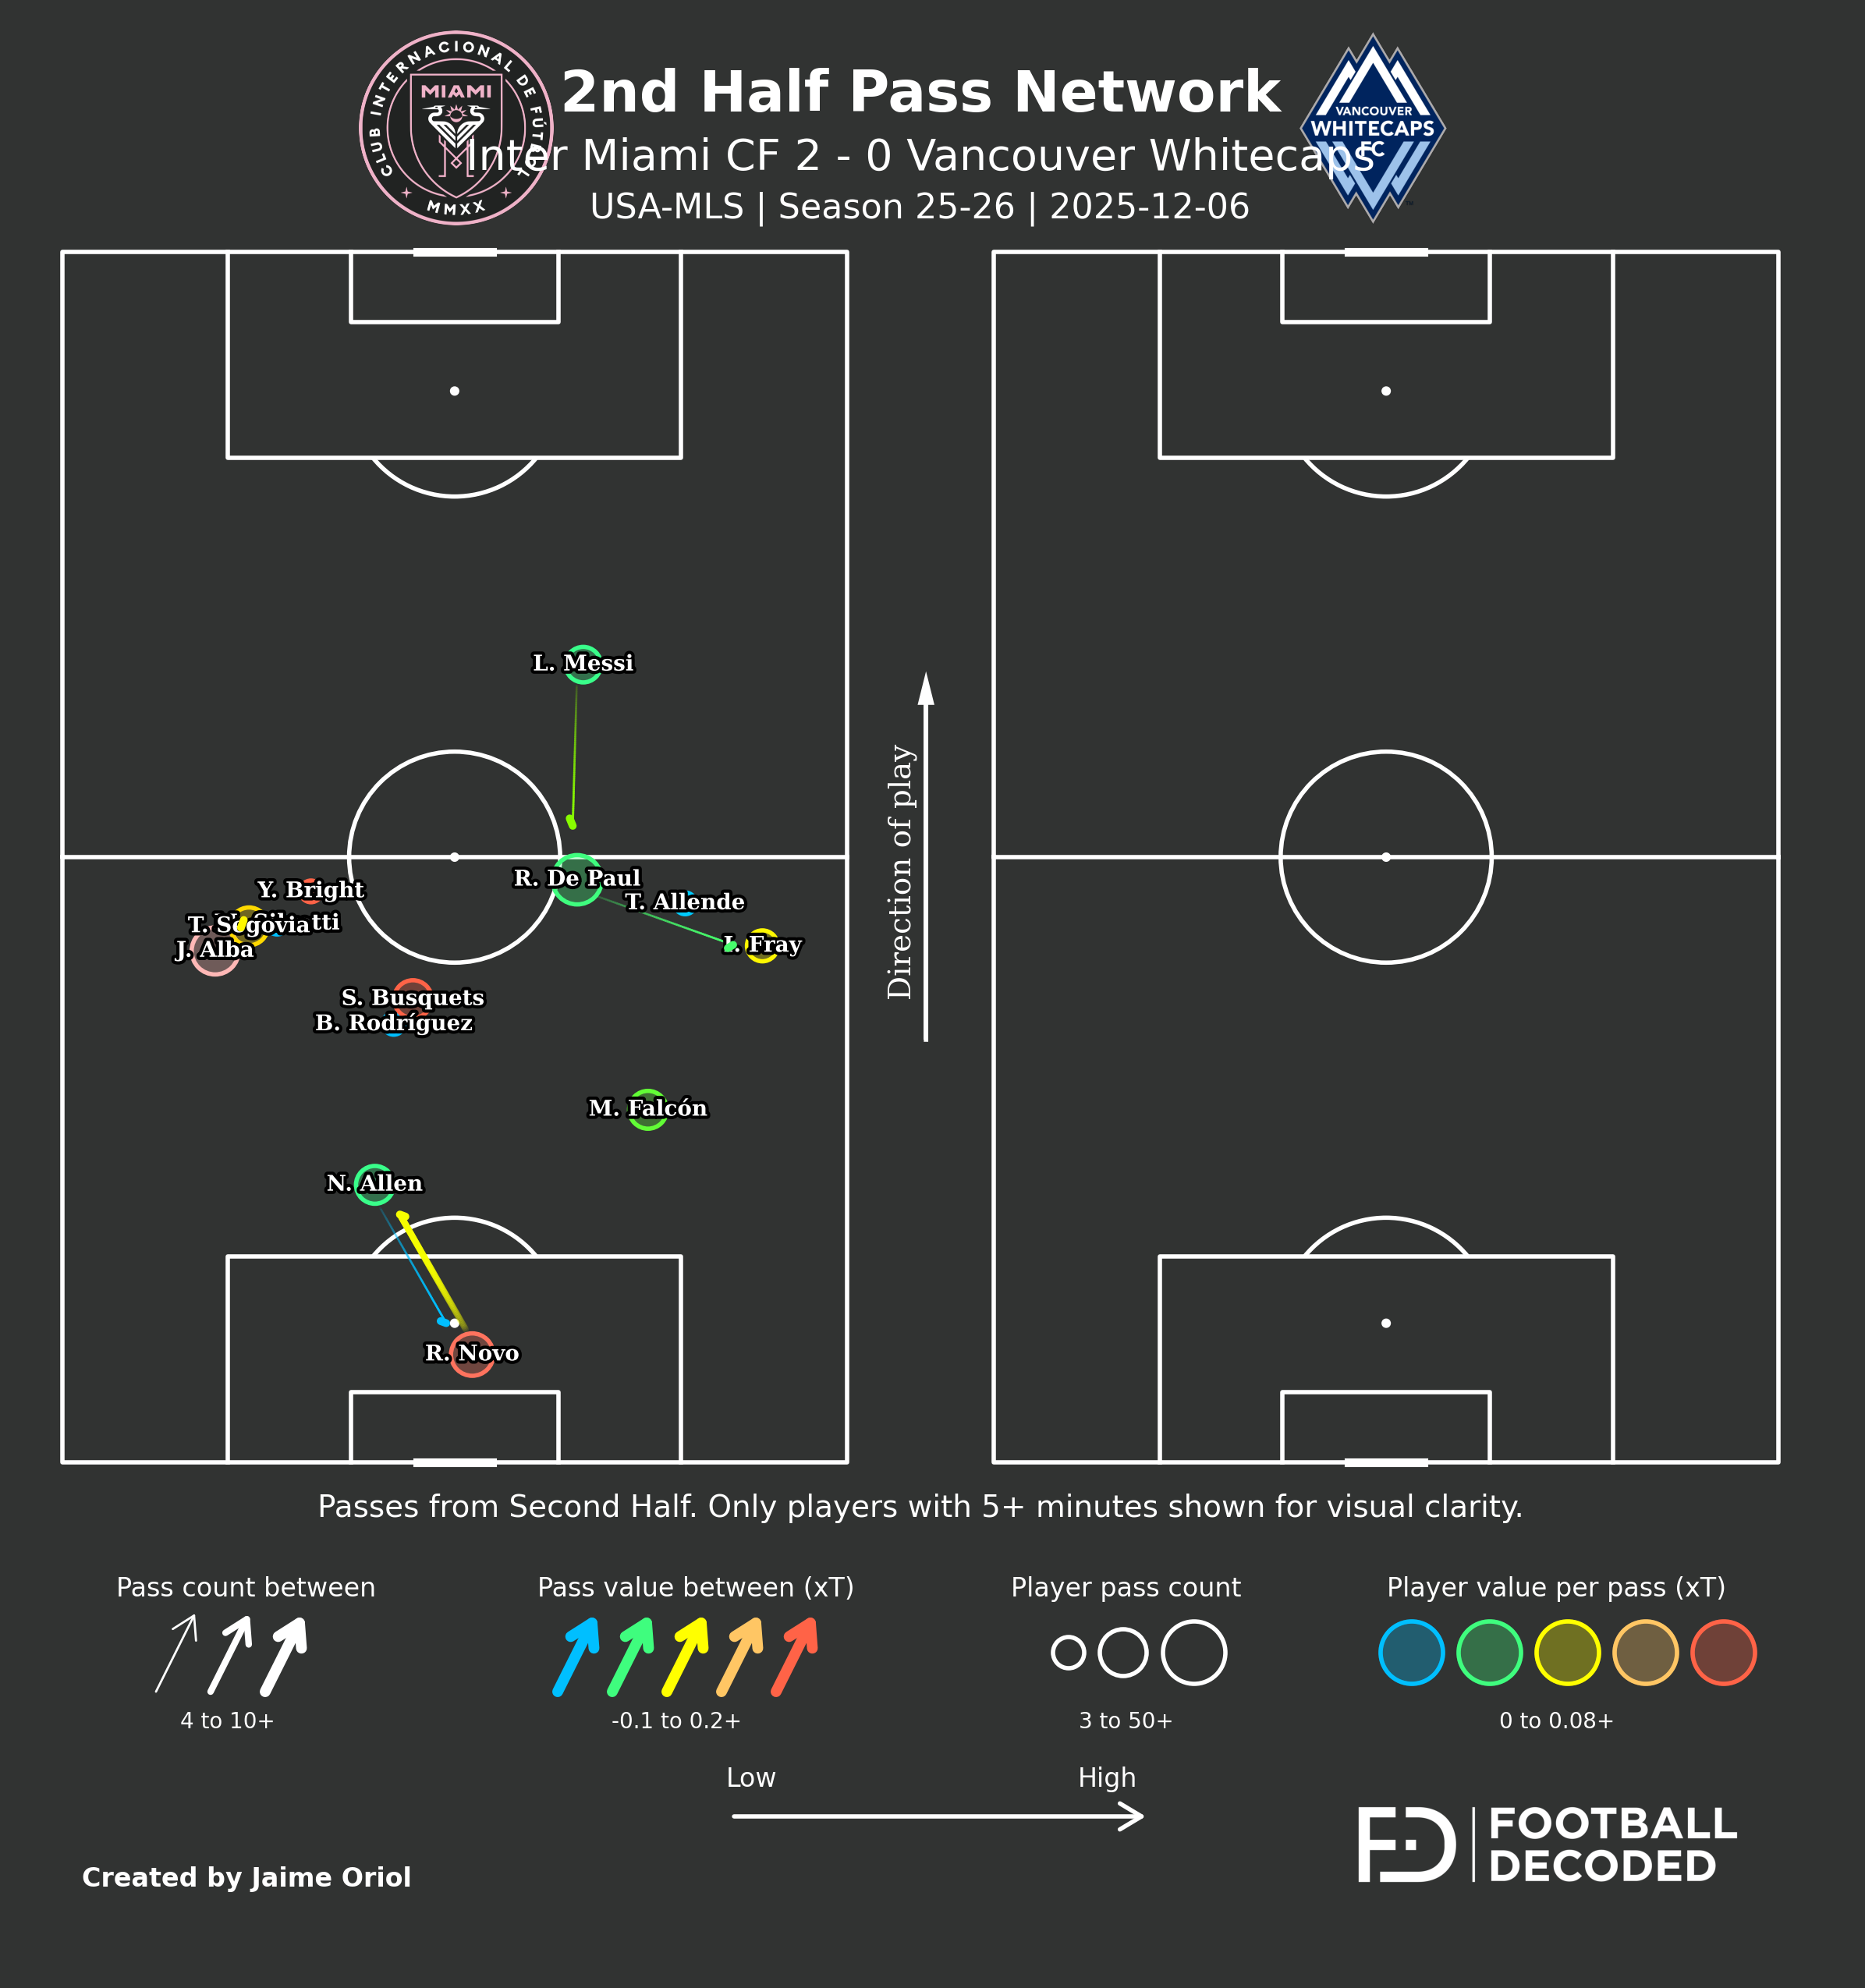

In [6]:
# Pass Network - Segundo tiempo (jugadores >5 minutos)
fig_network_second = plot_pass_network_second_half(
    network_csv_path=f'{DATA_PATH}/player_network.csv',
    info_csv_path=f'{DATA_PATH}/match_info.csv',
    aggregates_csv_path=f'{DATA_PATH}/match_aggregates.csv',
    home_logo_path=HOME_LOGO_PATH,
    away_logo_path=AWAY_LOGO_PATH
)

KeyError: 'Vancouver Whitecaps'

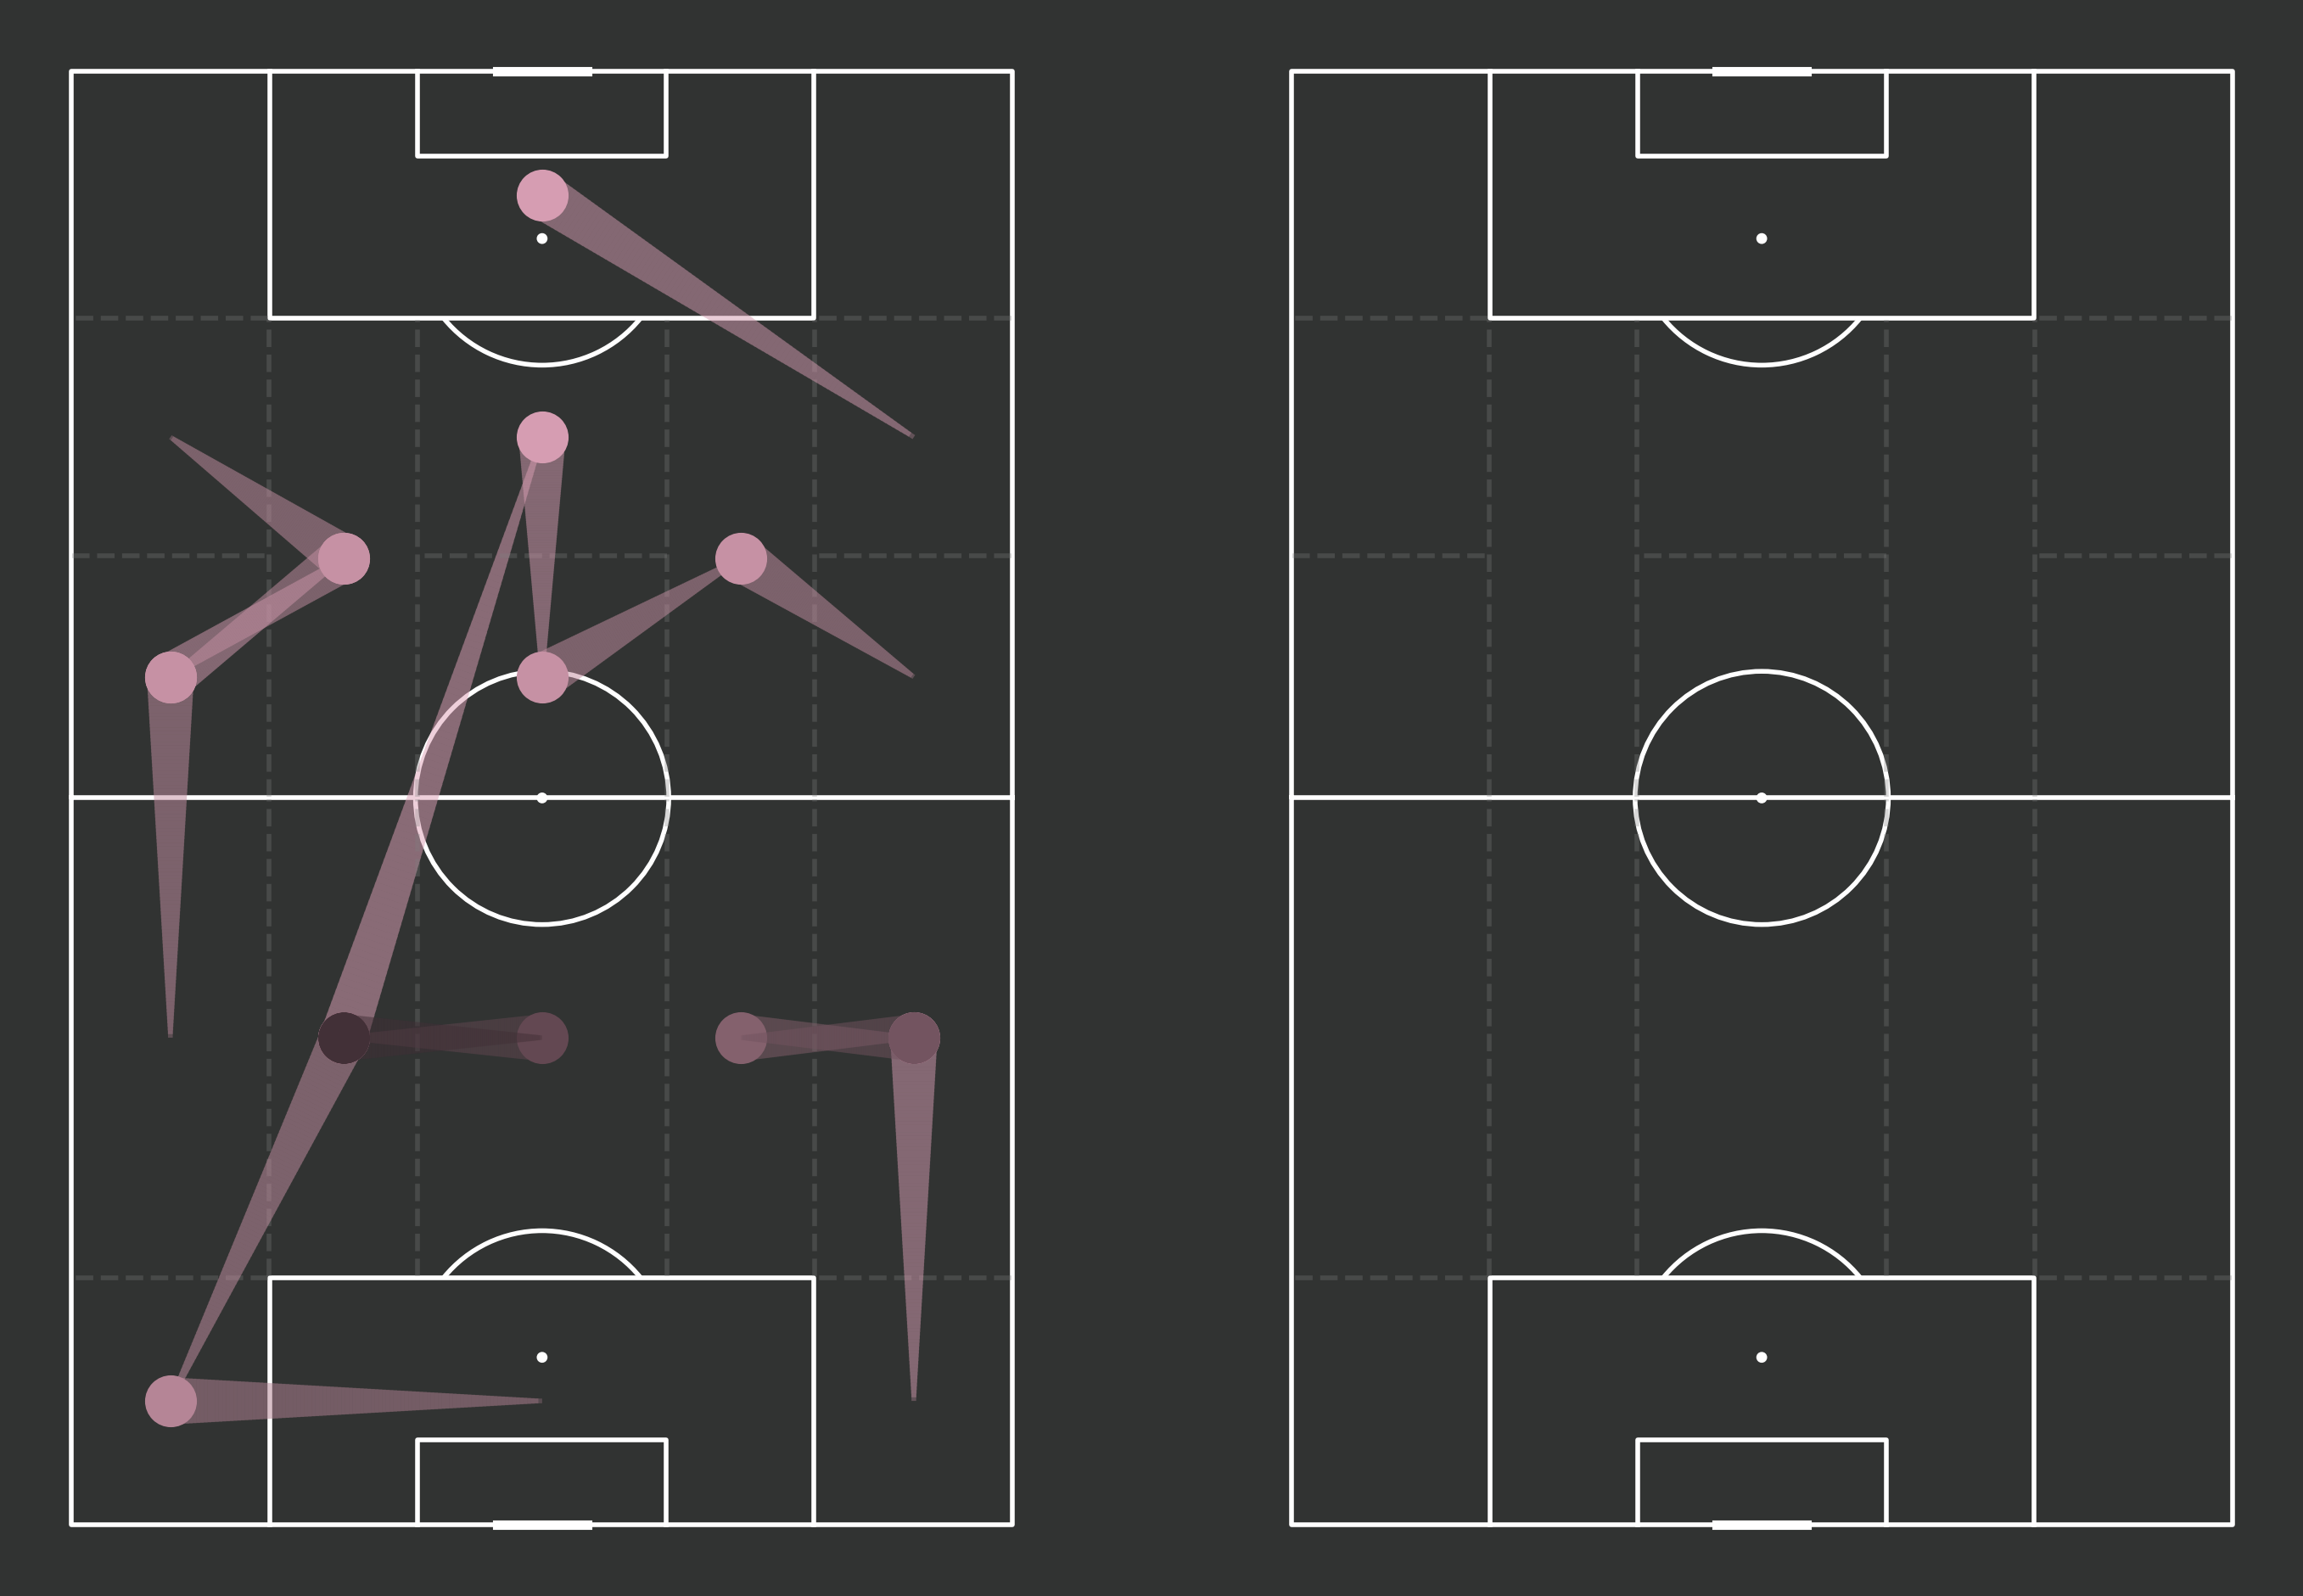

In [7]:
# Pass Flow - Flujo de pases
fig_flow = plot_pass_flow(
    events_csv_path=f'{DATA_PATH}/match_events.csv',
    info_csv_path=f'{DATA_PATH}/match_info.csv',
    home_colors=HOME_COLORS,
    away_colors=AWAY_COLORS,
    home_logo_path=HOME_LOGO_PATH,
    away_logo_path=AWAY_LOGO_PATH
)

In [ ]:
# Pass Hull - Área de influencia
fig_hull = plot_pass_hull(
    events_csv_path=f'{DATA_PATH}/match_events.csv',
    info_csv_path=f'{DATA_PATH}/match_info.csv',
    aggregates_csv_path=f'{DATA_PATH}/match_aggregates.csv',
    home_colors=HOME_COLORS,
    away_colors=AWAY_COLORS,
    home_logo_path=HOME_LOGO_PATH,
    away_logo_path=AWAY_LOGO_PATH
)

In [ ]:
# Preparar datos de disparos para Shot Report
def create_shots_csv():
    events = pd.read_csv(f'{DATA_PATH}/match_events.csv')
    shots = events[events['event_type'].str.contains('Shot|Goal', case=False, na=False)].copy()
    shots['is_goal'] = shots['event_type'] == 'Goal'
    shots['body_part'] = shots['qualifiers'].str.contains('Head', na=False).map({True: 'Head', False: 'Foot'})
    shots['xg'] = pd.to_numeric(shots['xg'], errors='coerce').fillna(0.0)
    shots.to_csv(f'{DATA_PATH}/shots_temp.csv', index=False)
    print(f"Disparos: {len(shots)} | Goles: {shots['is_goal'].sum()} | xG: {shots['xg'].sum():.3f}")
    return shots

shots_data = create_shots_csv()

# Shot Map Report
fig_report = plot_shot_report(
    csv_path=f'{DATA_PATH}/shots_temp.csv',
    home_logo_path=HOME_LOGO_PATH,
    away_logo_path=AWAY_LOGO_PATH,
    season=f'{SEASON} | {MATCH_DATE}'
)

In [ ]:
# LIONEL MESSI - Análisis Individual
events = pd.read_csv(f'{DATA_PATH}/match_events.csv')
aggregates = pd.read_csv(f'{DATA_PATH}/match_aggregates.csv')

messi_enriched = [
    ("Minutes played", "90"),
    ("Assists", "2"),
    ("Chances created & Passes final 3rd", "8 (4+4)"),
    ("Expected assists (xA)", "0.50"),
    ("Accurate passes", "17/19 (89%)"),
    ("Successful dribbles", "3/7 (43%)"),
    ("Touches in opposition box", "3"),
    ("Ground duels won", "6/11 (55%)")
]

fig_messi = create_player_analysis_complete(
    player_name='Lionel Messi',
    team_name=f'{HOME_TEAM} vs {AWAY_TEAM}',
    enriched_metrics=messi_enriched,
    events_df=events,
    player_image_path='../caras/extras/messi.png'
)